In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

import tensorflow as tf

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-06-10 10:43:22.734657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load & View Data

In [2]:
file_path = "/Users/igmark/Desktop/WGU Data Files/amazon_cells_labelled.txt"
amazon = pd.read_csv(file_path, delimiter='\t', header=None, names=['review', 'rating'])
amazon

,review,rating
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [3]:
file_path = "/Users/igmark/Desktop/WGU Data Files/yelp_labelled.txt"
yelp = pd.read_csv(file_path, delimiter='\t', header=None, names=['review', 'rating'])
yelp

,review,rating
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
file_path = "/Users/igmark/Desktop/WGU Data Files/imdb_labelled.txt"
imdb = pd.read_csv(file_path, delimiter='\t', header=None, names=['review', 'rating'])
imdb

,review,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [5]:
df = pd.concat([amazon, imdb, yelp])
df.reset_index(inplace=True)

In [6]:
df.shape

(2748, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   2748 non-null   int64 
 1   review  2748 non-null   object
 2   rating  2748 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.5+ KB


In [8]:
df.describe()

,index,rating
count,2748.000000,2748.000000
mean,465.203057,0.504367
std,276.612338,0.500072
min,0.000000,0.000000
25%,228.750000,0.000000
50%,457.500000,1.000000
75%,686.250000,1.000000
max,999.000000,1.000000


In [9]:
df['rating'].value_counts()

1    1386
0    1362
Name: rating, dtype: int64

In [10]:
df.isna().sum()

index     0
review    0
rating    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.review.sample(10)

411           I highly recommend this device to everyone!
1394    Being a 90's child, I truly enjoyed this show ...
2441    The sergeant pepper beef sandwich with auju sa...
675            Can't upload ringtones from a third party.
886     I didn't want the clip going over the top of m...
1258    This film (and I use that word loosely) is an ...
158                           And I just love the colors!
2572                                       Awful service.
1270    I knew when I saw the film that more great thi...
1207                               I rather enjoyed it.  
Name: review, dtype: object

## Exploratory Data Analysis

#### Vocabulary Size

In [13]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

text_data = df['review'].astype(str)

# Tokenize the text data into individual words
tokens = [word_tokenize(text) for text in text_data]

# Flatten the list of tokens into a single list
all_words = [word for sublist in tokens for word in sublist]

# Get the unique words (vocabulary)
vocabulary = set(all_words)

# Calculate the vocabulary size
vocabulary_size = len(vocabulary)

print("Vocabulary Size:", vocabulary_size)


Vocabulary Size: 6078


#### Presence of Unusual Characters

In [14]:
commentary = df['review']
list_of_char = []
for comment in commentary:
    for char in comment:
        if char not in list_of_char:
            list_of_char.append(char)
print(list_of_char)

['S', 'o', ' ', 't', 'h', 'e', 'r', 'i', 's', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'U', 'I', 'b', 'c', 'v', '.', 'G', 'd', ',', 'E', 'x', 'j', 'T', '4', '5', 'M', 'A', 'J', 'O', 'R', 'P', 'B', 'L', '!', 'z', 'N', 'W', 'q', 'H', '+', 'V', '"', 'Y', 'D', 'F', 'k', "'", 'K', 'C', '/', '7', '3', '6', '8', '0', '2', '?', 'Z', '-', '1', ':', ')', '(', 'Q', '&', '$', '*', ';', 'X', '%', '9', '#', '[', ']', '\x96', '\t', '\n', 'é', '\x85', 'å', '\x97', 'ê']


In [15]:
import re
from nltk.tokenize import word_tokenize

reviews = df['review']

alpha_chars = set()
num_chars = set()
nonal_num_chars = set()

for review in reviews:
    tokens = word_tokenize(review.lower())
    for token in tokens:
        for char in token:
            if re.match(r'[a-zA-Z]', char):
                alpha_chars.add(char)
            elif re.match(r'[0-9]', char):
                num_chars.add(char)
            else:
                nonal_num_chars.add(char)

print('Alpha Characters:')
print(alpha_chars)
print('Total of', len(alpha_chars), 'unique English letters in this dataset\n')

print('Numeric Characters:')
print(num_chars)
print('Total of', len(num_chars), 'unique numerical characters in this dataset\n')

print('Non-alphanumeric characters:')
print(nonal_num_chars)
print('Total of', len(nonal_num_chars), 'unique special characters in this dataset')


Alpha Characters:
{'v', 'y', 'q', 'e', 'i', 'o', 'c', 'k', 'f', 's', 'r', 'a', 'm', 'p', 'u', 'd', 't', 'z', 'g', 'n', 'x', 'l', 'j', 'w', 'h', 'b'}
Total of 26 unique English letters in this dataset

Numeric Characters:
{'1', '7', '8', '3', '9', '4', '5', '6', '0', '2'}
Total of 10 unique numerical characters in this dataset

Non-alphanumeric characters:
{'.', '%', '/', '`', ':', ']', ',', '+', '$', '\x96', '\x97', 'é', '(', ')', '-', '[', '&', '#', '?', ';', '!', "'", 'å', 'ê', '*'}
Total of 25 unique special characters in this dataset


In [16]:
import emoji

def checkEmoji(text):
    has_emoji = any(emoji.is_emoji(char) for char in text)
    return has_emoji

df["emoji"] = df['review'].apply(lambda x: checkEmoji(x))

emoji_counts = df['emoji'].value_counts()
print(emoji_counts)



False    2748
Name: emoji, dtype: int64


#### Proposed Word Embedding Length

In [17]:
from keras.preprocessing.text import Tokenizer

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])

# Get the maximum sequence length
max_sequence_length = max(len(seq) for seq in sequences)

# Set the proposed word embedding length
proposed_embedding_length = int(np.ceil(max_sequence_length * 0.1))

print("Max Word Length", proposed_embedding_length)

Max Word Length 140


In [18]:
proposed_embedding_length = int(round(np.sqrt(np.sqrt(len(vocabulary))), 0))
print("Proposed Word Embedding Length:", proposed_embedding_length)

Proposed Word Embedding Length: 9


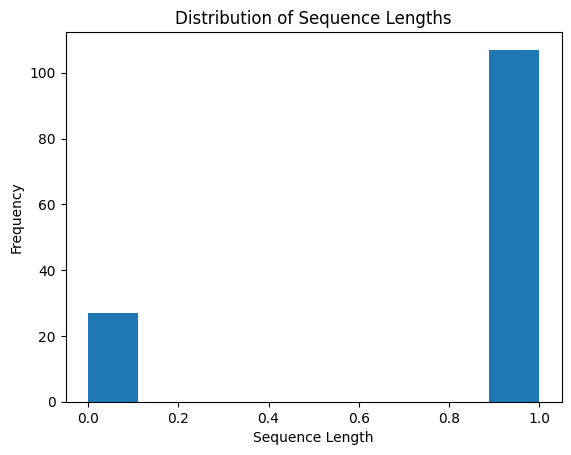

In [19]:
# Calculate sequence lengths
sequence_lengths = [len(word_tokenize(review)) for review in review]

# Plot the distribution of sequence lengths
plt.hist(sequence_lengths, bins='auto')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()


In [20]:
# Calculate the lengths of all sequences
sequence_lengths = [len(seq) for seq in sequences]

# Maximum sequence length
max_sequence_length = np.max(sequence_lengths)

# Median sequence length
median_sequence_length = np.median(sequence_lengths)

# Minimum sequence length
min_sequence_length = np.min(sequence_lengths)

print("Maximum Sequence Length:", max_sequence_length)
print("Median Sequence Length:", median_sequence_length)
print("Minimum Sequence Length:", min_sequence_length)


Maximum Sequence Length: 1400
Median Sequence Length: 10.0
Minimum Sequence Length: 1


### Tokenization

In [22]:
import random
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



rev_list = []
rev_len = []
stop_words = stopwords.words('english')

for review in df.review:
    review = re.sub("[^a-zA-Z\s]", "", review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    review = [word for word in review if not word in stop_words]
    lemma = WordNetLemmatizer()
    review = [lemma.lemmatize(word) for word in review]
    length = len(review)
    rev_len.append(length)
    rev_list.append(review)

n = random.randint(0, len(rev_list))
rev_list = np.asarray(rev_list, dtype=object)
print(rev_list[n])


['eargels', 'channel', 'sound', 'directly', 'ear', 'seem', 'increase', 'sound', 'volume', 'clarity']


In [23]:
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(rev_list)
word_index = tokenizer.word_index
word_counts = list(tokenizer.word_counts.items())
word_counts.sort(key=lambda y: y[1], reverse=True)
vocab_size = len(tokenizer.word_index)+1

max_seq_emb = int(round(vocab_size ** (1/4))) #, 0))
max_len = len(max(rev_list, key=len))

sequence = tokenizer.texts_to_sequences(rev_list)

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

print(padded_sequences)


[[ 27  50   5 ...   0   0   0]
 [ 18 159  93 ...   0   0   0]
 [ 20  12   1 ...   0   0   0]
 ...
 [272   3  10 ...   0   0   0]
 [  1 359 166 ...   0   0   0]
 [146  26  46 ...   0   0   0]]


In [25]:
print('Vocabulary size: ',vocab_size)
print('max sequence embed: ', max_seq_emb)
print('max review length: ', max_len)

Vocabulary size:  4764
max sequence embed:  8
max review length:  686


### Padding

In [26]:
n = random.randint(0, len(rev_list))
print('Original Review:')
print('"', df.review[n], '"')
print('____________________________________________________________')
print('')

print('Review split, lemmatized, and stop words removed:')
print(rev_list[n])
print('____________________________________________________________')
print('')

print('Review tokenized, sequenced, and padded:')
print(padded_sequences[n])


Original Review:
" And it was way to expensive. "
____________________________________________________________

Review split, lemmatized, and stop words removed:
['way', 'expensive']
____________________________________________________________

Review tokenized, sequenced, and padded:
[  2   6  10 118   7 942   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

### Number of categories of sentiment

In [27]:
import tensorflow as tf

num_classes = 2  # Two categories: positive/negative

model = tf.keras.Sequential([
    # ... (previous layers)
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
    # ... (other layers)
])

print("Number of sentiment categories:", num_classes)


Number of sentiment categories: 2


In [28]:
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense
from keras import backend

backend.clear_session()

model = Sequential()
model.add(Embedding(vocab_size, max_seq_emb))
model.add(GlobalAveragePooling1D())
model.add(Dense(50, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           38112     
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 38,613
Trainable params: 38,613
Non-trainable params: 0
_________________________________________________________________


### Split Into Training and Test Sets

In [29]:
X = padded_sequences
X

array([[ 27,  50,   5, ...,   0,   0,   0],
       [ 18, 159,  93, ...,   0,   0,   0],
       [ 20,  12,   1, ...,   0,   0,   0],
       ...,
       [272,   3,  10, ...,   0,   0,   0],
       [  1, 359, 166, ...,   0,   0,   0],
       [146,  26,  46, ...,   0,   0,   0]], dtype=int32)

In [30]:
y = np.array(df['review'].values)
y

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case, Excellent value.', 'Great for the jawbone.', ...,
       'Overall I was not impressed and would not go back.',
       "The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",
       "Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."],
      dtype=object)

In [31]:
print(X.shape, y.shape)

(2748, 686) (2748,)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences,
                                                    np.array(df.rating),
                                                    test_size=0.2,
                                                    random_state=42)

In [34]:
print(X_train.shape, y_train.shape)

(2198, 686) (2198,)


### Saved to new files

In [35]:
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

In [165]:
print('Size & shape of the training data set:')
print('Training data X values (reviews text) size = ',X_train.size, ' and shape = ', X_train.shape)
print('Training data Y values (review ratings) size = ',y_train.size, ' and shape = ', y_train.shape)

print('Size & shape of the training data set:')
print('Training data X values (reviews text) size = ',X_test.size, ' and shape = ', X_test.shape)
print('Training data Y values (review ratings) size = ',y_test.size, ' and shape = ', y_test.shape)

Size & shape of the training data set:
Training data X values (reviews text) size =  1507828  and shape =  (2198, 686)
Training data Y values (review ratings) size =  2198  and shape =  (2198,)
Size & shape of the training data set:
Training data X values (reviews text) size =  377300  and shape =  (550, 686)
Training data Y values (review ratings) size =  550  and shape =  (550,)


### Train Model

In [159]:
from tensorflow.keras.callbacks import EarlyStopping

# Define hyperparameters
activation = 'sigmoid'
loss = 'binary_crossentropy'
optimizer = 'adam'  # or 'rmsprop'


# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=8)

# Define the model architecture
model = Sequential([
    Embedding(38112, 8, input_length=None),
    GlobalAveragePooling1D(),
    Dense(50, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=80,
                    validation_split=0.3, callbacks=[early_stopping_monitor], verbose=True)


Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_55 (Embedding)    (None, None, 8)           304896    
                                                                 
 global_average_pooling1d_55  (None, 8)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_110 (Dense)           (None, 50)                450       
                                                                 
 dense_111 (Dense)           (None, 1)                 51        
                                                                 
Total params: 305,397
Trainable params: 305,397
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
49/49 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5059 - val_loss: 0.6

### Model Accuracy

In [160]:
score = model.evaluate(X_test, y_test, verbose=1)

print('Final Model Loss: ', round(score[0],5))
print('Final Model Accuracy: ', round(score[1]*100, 2),'%')


18/18 [==============================] - 0s 919us/step - loss: 0.5312 - accuracy: 0.7436
Final Model Loss:  0.53121
Final Model Accuracy:  74.36 %


### Plot the Model Accuracy and Loss

#### Seperate Plots

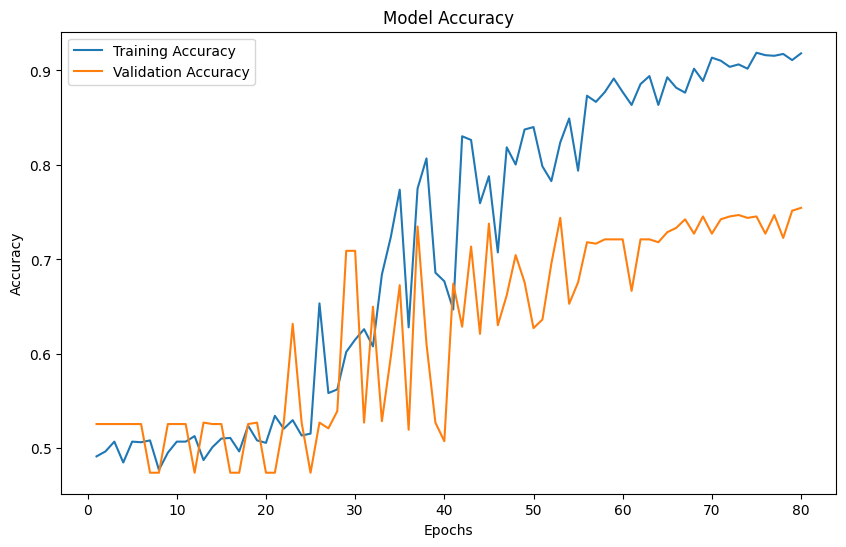

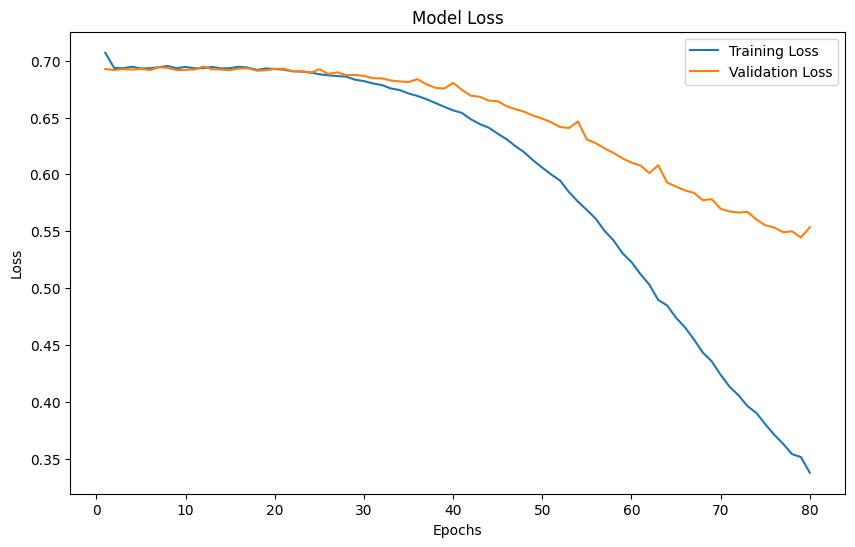

In [153]:
# Get the training history
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Combined Plots

<function matplotlib.pyplot.show(close=None, block=None)>

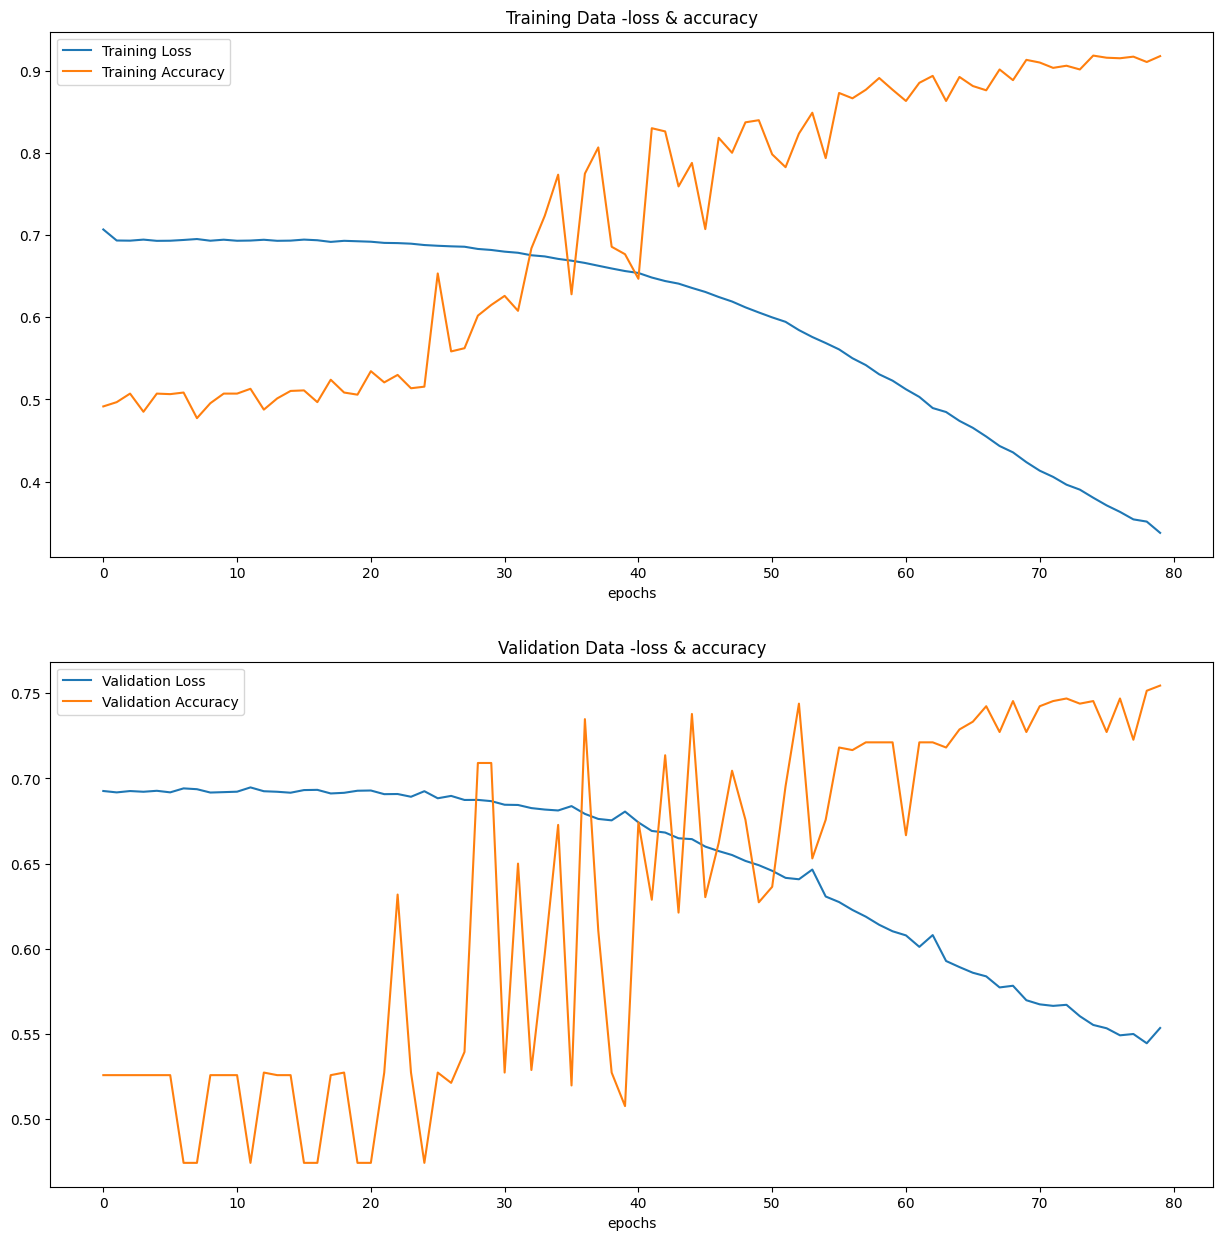

In [154]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.title('Training Data -loss & accuracy')

plt.subplot(2,1,2)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.title('Validation Data -loss & accuracy')

plt.show

### Save the trained model

In [162]:
model.save('D213_trained_model.h5')

### Model Prediction

18/18 [==============================] - 0s 862us/step


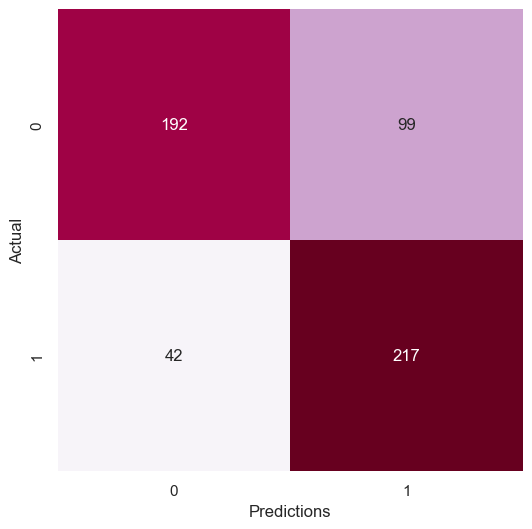

In [175]:
predictions = model.predict(X_test)
predictions = np.round(predictions,0).astype(int)

con_mat = confusion_matrix(y_test, predictions)
sns.set(rc={'figure.figsize':(6,6)})
cmap = plt.cm.get_cmap('PuRd')  
sns.heatmap(con_mat, annot=True, fmt='d', cbar=False, cmap=cmap).set(ylabel='Actual', xlabel='Predictions')
plt.show()